### Problem 1


Consider the matrix $A$:
$$
A =
\begin{pmatrix}
0 & 1 & 2 & 3 & 4 \\
1 & 2 & 3 & 4 & 0 \\
2 & 3 & 4 & 0 & 1 \\
3 & 4 & 0 & 1 & 2 \\
4 & 0 & 1 & 2 & 3
\end{pmatrix}
$$
and the convolutional layer Conv2d with the property (in_channels=1, out_channels=1, kernel_size=2, stride=1, padding=1) and the kernel $K$
$$
K =
\begin{pmatrix}
0 & 1 \\
1 & 2 
\end{pmatrix}
$$

Compute the output Conv2d(A) using Python code.

In [25]:
import torch
import torch.nn.functional as nn

A = torch.tensor(([[[[0, 1, 2, 3, 4], [1, 2, 3, 4, 0], [2, 3, 4, 0, 1], [3, 4, 0, 1, 2], [4, 0, 1, 2, 3]]]])).float()
K = torch.tensor([[[[0, 1], [1, 2]]]]).float()

print()
print(A)
print()
print(K)

# Apply convolution with given kernel
out = nn.conv2d(A, K, stride=1, padding=1)
print('output image: \n', out)

# print('output image: \n', out.squeeze().detach().numpy())


tensor([[[[0., 1., 2., 3., 4.],
          [1., 2., 3., 4., 0.],
          [2., 3., 4., 0., 1.],
          [3., 4., 0., 1., 2.],
          [4., 0., 1., 2., 3.]]]])

tensor([[[[0., 1.],
          [1., 2.]]]])
output image: 
 tensor([[[[ 0.,  2.,  5.,  8., 11.,  4.],
          [ 2.,  6., 10., 14.,  8.,  0.],
          [ 5., 10., 14.,  8.,  2.,  1.],
          [ 8., 14.,  8.,  2.,  6.,  2.],
          [11.,  8.,  2.,  6., 10.,  3.],
          [ 4.,  0.,  1.,  2.,  3.,  0.]]]])


### Problem 2
For the same matrix $A$ in Problem 1, consider the Max Pooling layer MaxPool2d with the property (kernel_size=2, stride=1, padding=1). Compute the output MaxPool2d(A) using Python code.

In [26]:
# Apply pooling with given kernel
out = nn.max_pool2d(A, kernel_size=2, stride=1, padding=1)

print('output image: \n', out)


output image: 
 tensor([[[[0., 1., 2., 3., 4., 4.],
          [1., 2., 3., 4., 4., 4.],
          [2., 3., 4., 4., 4., 1.],
          [3., 4., 4., 4., 2., 2.],
          [4., 4., 4., 2., 3., 3.],
          [4., 4., 1., 2., 3., 3.]]]])


### Problem 3

LeNet is a convolutional neural network structure proposed by LeCun et al. in 1998. Read more details in LeNet in https://en.wikipedia.org/wiki/LeNet and implement LeNet (see the picture below, the LeNet structure is on the left) by modifying the code in the lecture note "lecture-10-CNN-classification". Report the accuracy of the LeNet.

Some useful hints:
1. You need to modify the class CNNModel(nn.Module) in Step 3).
2. "Dense: 120 fully connected neurons" in the picture refers to the linear layer in feedforward neural network. The output dimension is 120 and the input dimension is determined by the previous layer.

![convert notebook to web app](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Comparison_image_neural_networks.svg/480px-Comparison_image_neural_networks.svg.png)

100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw


100.0%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw




25.8%

100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100.0%


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

torch.Size([1, 28, 28])
5


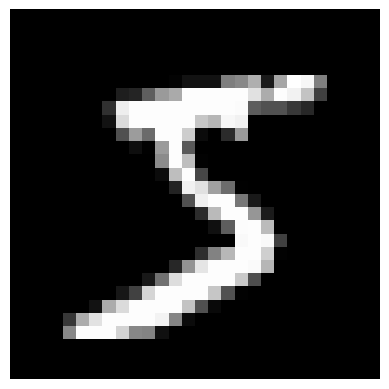

In [27]:
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torchvision.datasets as dsets

train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

img, label = train_dataset[0]
print(img.shape)
print(label)

plt.figure()
plt.axis("off")
plt.imshow(img.squeeze(), cmap="gray")

In [28]:
batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [29]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()

        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=2)
        self.relu1 = nn.ReLU()

        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.relu2 = nn.ReLU()

        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected 1 (readout)
        self.fc1 = nn.Linear(16 * 5 * 5, 120) 

    def forward(self, x):
        
        # input: x, size (num_img, 28, 28)
        
        # Convolution 1
        # O = (28 - 5 + 2*2)/ 1 + 1 = 28
        # output: size (num_img, 6, 28, 28)
        out = self.cnn1(x)
        out = self.relu1(out)

        # Max pool 1
        # O = 28 / 2 = 14
        # output: size (num_img, 6, 14, 14)
        out = self.maxpool1(out)

        # Convolution 2
        # O = ((14 - 5 + 2*0)/ 1) + 1 = 10
        # output: size (num_img, 16, 10, 10)
        out = self.cnn2(out)
        out = self.relu2(out)

        # Max pool 2
        # O = 10 / 2 = 5
        # output: size (num_img, 16, 5, 5)
        out = self.maxpool2(out)

        # Resize
        # Original size: (num_img, 16, 5, 5)
        # out.size(0): num_img
        # New out size: (num_img, 16 * 5 * 5)
        out = out.view(out.size(0), -1)

        # Linear function (readout)
        # output: size (num_img, 120)
        out = self.fc1(out)

        return out

In [30]:
model = LeNet()
criterion = nn.CrossEntropyLoss()
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [31]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images
        images = images.requires_grad_()

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images
                images = images.requires_grad_()

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.34271934628486633. Accuracy: 88.58999633789062
Iteration: 1000. Loss: 0.29177042841911316. Accuracy: 91.37999725341797
Iteration: 1500. Loss: 0.20136313140392303. Accuracy: 93.4800033569336
Iteration: 2000. Loss: 0.24310016632080078. Accuracy: 94.58000183105469
Iteration: 2500. Loss: 0.10245577991008759. Accuracy: 95.61000061035156
Iteration: 3000. Loss: 0.18053993582725525. Accuracy: 96.27999877929688
